# Declaration of Originality

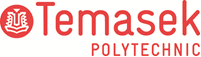

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Jerrica Low Yuin En (2404802G)
* Tutorial Group                : T07
* Tutor						    : Ms Ester
* Submission Date               : 11 Feb 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
# To import all the required libraries throughout this porject

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split
from sklearn.model_selection import train_test_split

# Models (regression)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV,KFold

# Regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Business Understanding
Goal: The goal of this project is to develop a machine learning model that is able to predict the price of a car based on its features, such as the vehicle specification, usage, and other relevant attributes.

Being able to accurately predict the car prices can help sellers to set an apporpriate competitive prices and assist buyers in making an informed purcharshing decisions beforehand. 

Problem Type: This problem is a regression task, as the target variable which is "car price" is a continuous numerical value.

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
# To load my dataset from the CSV file into the pandas DataFrame to get a look at the data
FILE_PATH= "car_price_prediction.csv"
df = pd.read_csv(FILE_PATH)

# To view the first five row of my dataset 
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,26556126,157,-,ROLLS-ROYCE,Phantom,1939,Cabriolet,Yes,Petrol,5,129000 km,8,Automatic,Rear,4-May,Left wheel,Silver,0
1,20746880,157,-,MERCEDES-BENZ,S 500,1939,Limousine,Yes,Petrol,2.4,126000 km,4,Automatic,Rear,4-May,Left wheel,White,0
2,41720592,200,-,ROLLS-ROYCE,Phantom,1939,Limousine,Yes,Petrol,2.2,169000 km,4,Manual,Rear,4-May,Left wheel,White,0
3,32171534,119172,-,MERCEDES-BENZ,230 W153,1943,Sedan,Yes,Petrol,2.2,69000 km,4,Automatic,Rear,4-May,Left wheel,White,0
4,38169002,150,-,BMW,340,1947,Limousine,No,Petrol,2,165000 km,6,Manual,Rear,4-May,Left wheel,White,0


## 2.2 Summary Statistics

In [3]:
# Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

Insights: 

Currently, this dataset contains 19237 rows and 18 columns, which has a mix of numerical and categorical features. For the numerical (int64) there are 5 columns which includes the Price, Prod. year, Cylinders, Airbags and ID, while the remaining 13 columns are categorical (object).

The target variable which is the "Price" is numberical, which helps to confirm that this project is a regression task. But with multiple categorical variables it does indicate that feature encoding would be needed before training the model.

In [4]:
# Check for missing data
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Insights:

There are no missing values in this dataset, which means all of 18 columns does contain complete data, which also includes the target variable "Price". So no imputation or removal of records is required for any missing value.

In [5]:
## Describe data distribution
df.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,1.923700e+04,1.923700e+04,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000
unique,NaN,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN
top,NaN,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,4-May,Left wheel,Black,NaN
freq,NaN,NaN,5819,3769,1083,NaN,8736,13954,10150,3916,721,NaN,13514,12874,18332,17753,5033,NaN
mean,4.557654e+07,1.855593e+04,NaN,NaN,NaN,2010.912824,NaN,NaN,NaN,NaN,NaN,4.582991,NaN,NaN,NaN,NaN,NaN,6.582627
std,9.365914e+05,1.905813e+05,NaN,NaN,NaN,5.668673,NaN,NaN,NaN,NaN,NaN,1.199933,NaN,NaN,NaN,NaN,NaN,4.320168
min,2.074688e+07,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4.569837e+07,5.331000e+03,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,4.577231e+07,1.317200e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,4.580204e+07,2.207500e+04,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000


Insights:

This summary statistic does show some NaN values for certain metics, but they only appear as some statistic aren't applicable to the specific data type. 

Such as some numerical statistic such as the mean and standard deviation tend to only compute for the numerical columns, while the categorical statistic such as the unique values, as well as most frequent categoris are only computed for categorical columns. 

But this does confirm that the dataset contains a mix of numerical and categorical features, while will need the appropriate preprocessing later before training the model.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

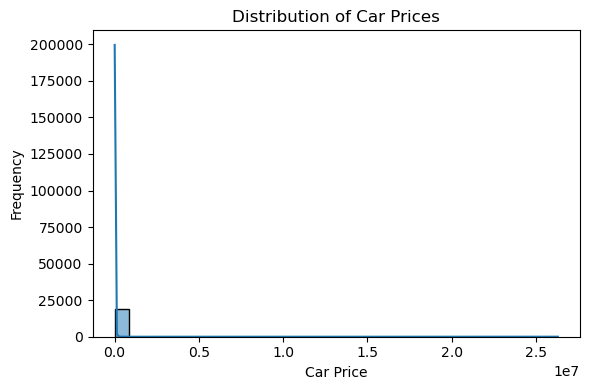

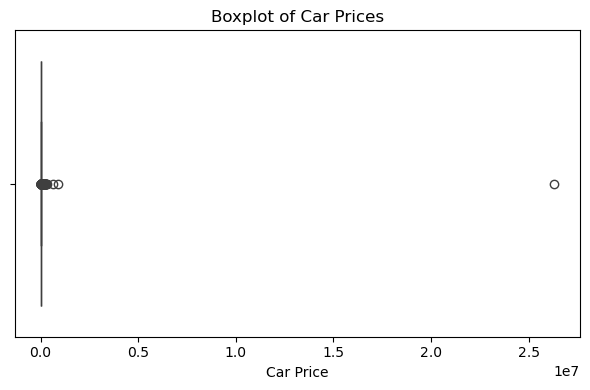

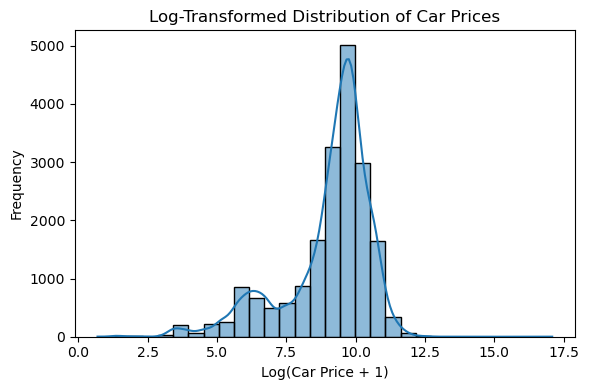

In [6]:
## Understanding distribution of target
col_y = "Price"  

# Summary statistics of target variable
df[col_y].describe()

# Histogram of target variable
plt.figure(figsize=(6, 4))
sns.histplot(df[col_y], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col_y])
plt.title("Boxplot of Car Prices")
plt.xlabel("Car Price")
plt.tight_layout()
plt.show()

# Log-transformed target distribution - histogram
plt.figure(figsize=(6, 4))
sns.histplot(np.log1p(df[col_y]), bins=30, kde=True)
plt.title("Log-Transformed Distribution of Car Prices")
plt.xlabel("Log(Car Price + 1)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Insights:

- Histogram of the Car Prices

For the historgram of the car prices it does show that it is highly right-skewed distribution. Which means most car prices are concentrated in the lower price range, while there is only a small number of car that are extremely high priced. The long right tail indicates that the presence of luxury or the rare vehicles are prices significantly higher than most of the cars in this dataset 

But this could be quite common in the real world pricing data and does negatively impact the model performance, especially for models that assumes a more symmetic distribution. As well as this large range of the values might also suggest that high prices outliers may disproportionately influence the model when training. 

- Boxplot of the Car Prices 

The boxplot does help to confirm that there is definetly many outliers in the car price data. As most of the observateion are grouped quite tightly near the lower end of the price range, while only some points are laying far above the upper whisker. 

These outliers represent the unusually expensive vehicles and identifying these outliers are important as they could distort my error metrics such as my RMSE and it could cause the model to focus more on the rare cases, as well as reducing the model ability to generalize to typical car prices, so this helps me in deciding whether i need to transform the target variable or not. 

- Log Transformed Distribution of Car Prices

After I had applied the logarithmic transformation to the car prices, the distribution has becom emore symmetric and more bell-shaped. So the extreme skewness is reduced and the influence of the larger value are compressed. 

So this help to stabilizes the variance, reducing the impact of the extreme outliers, allowing the model to learn the patterns more effectively and improving the covergence and predictive performance for many regression models, so as a result, a log transformed target variable is more suite for modelling and would expect a better performance. 

### 2.3.1.2 Understanding distribution of features

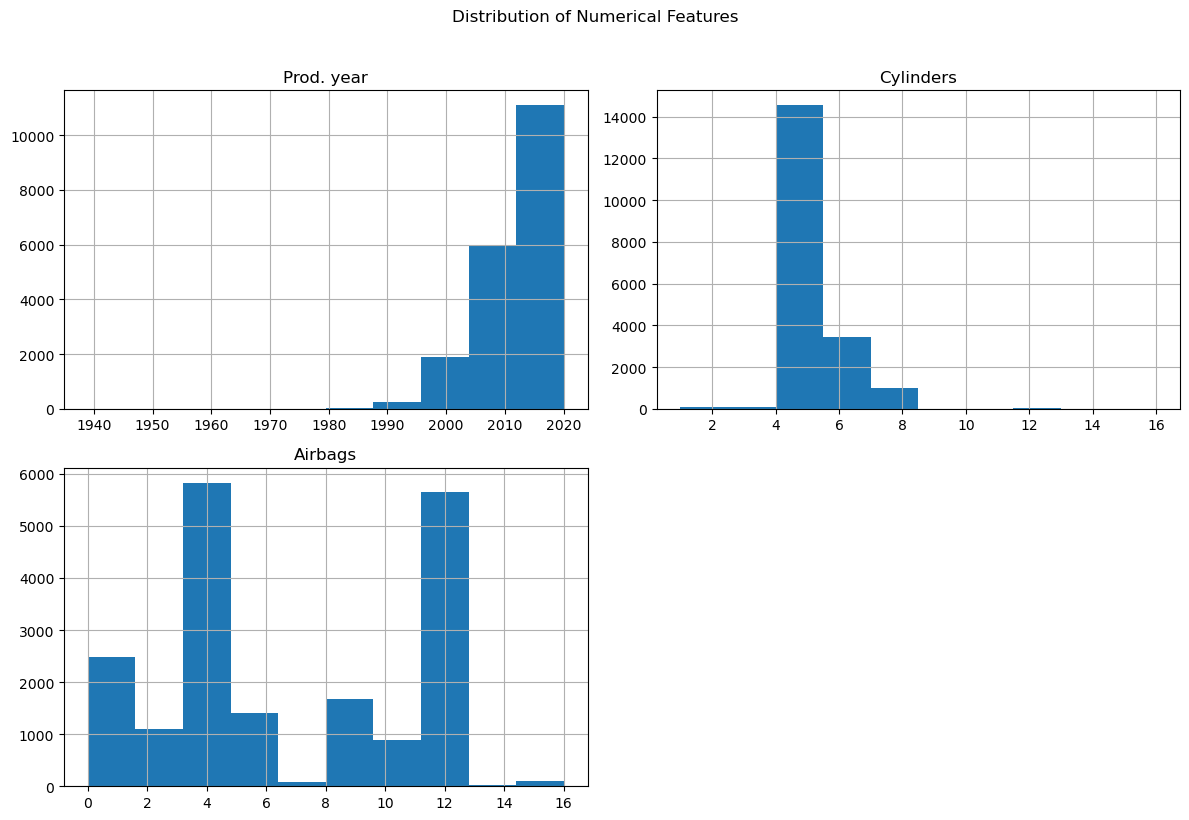

In [7]:
# Remove ID column (only the identifier)
if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# Numerical features distribution
# To select the numerical features and exclude target variable
num_features = df.select_dtypes(include=["int64", "float64"]).columns
num_features = num_features.drop(col_y)

# Plot histograms for numerical features
df[num_features].hist(figsize=(12, 8))
plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


Insights:

This numerical features has showed the varied distribution across the dataset. 

For the Production year it is right-skewed, with most of the vehicle being manufactures after 2000, which indicates that the newer cars does dominate the dataset, While the Cylinders are concentrated to around 4-6, it suggest that most of the vehicle are using the standard engine configurations, while there are some with extreme values that are rare. But for the Airbags it displays a discrete distribution with peaks at the safety configurations, showing the standard manufacturer designs instead of the continuous variation. 

Overall, these distribution indicated that the numerical features aren't normally distributed and they do contain skewnedd.

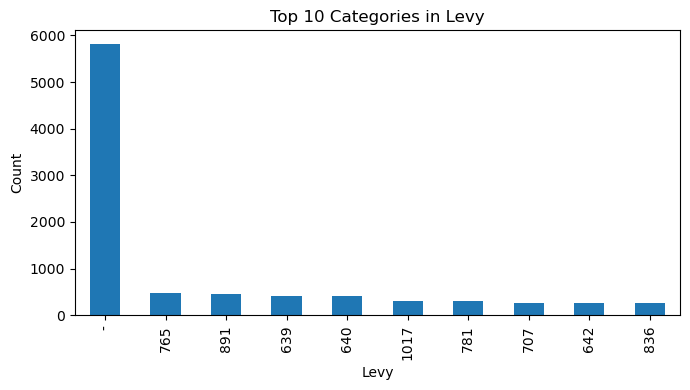

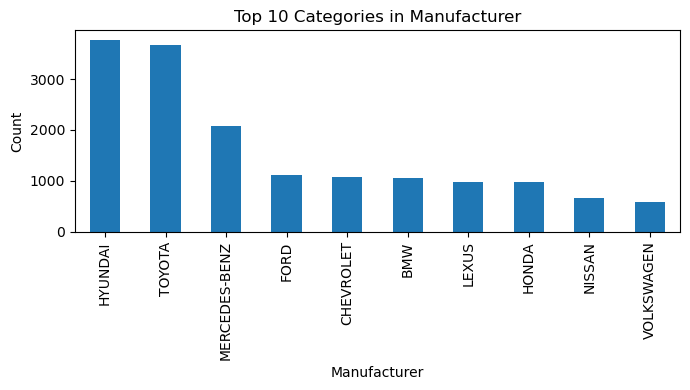

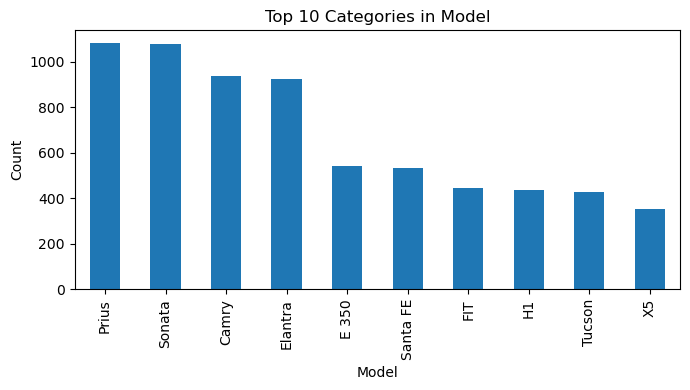

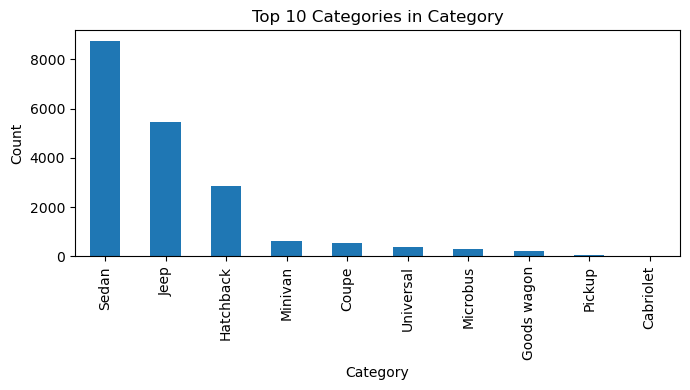

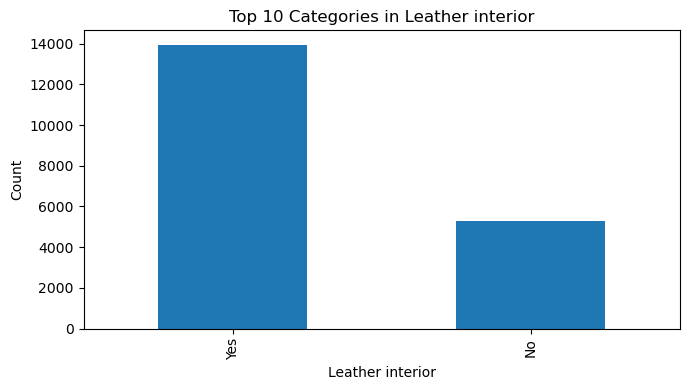

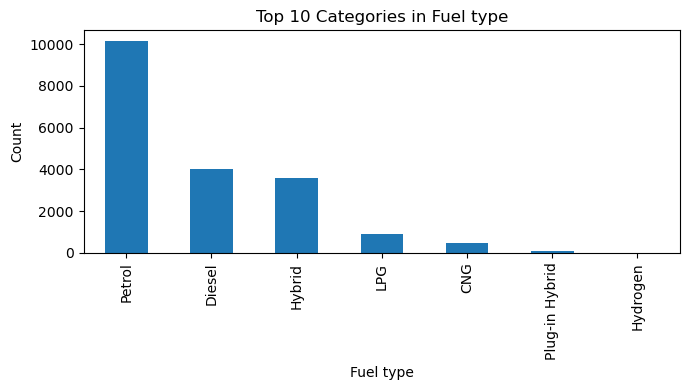

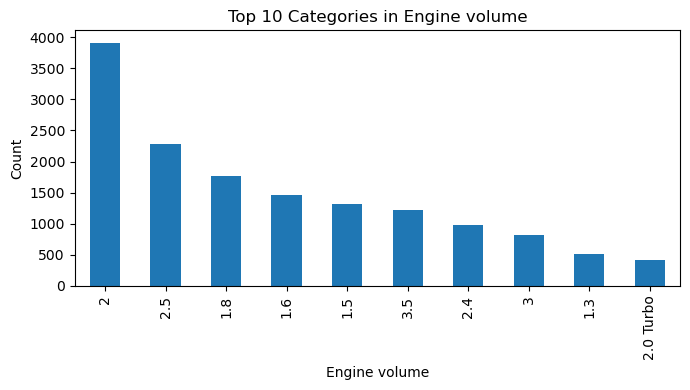

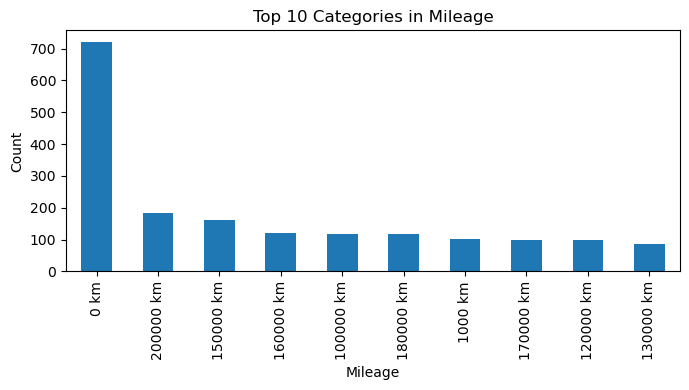

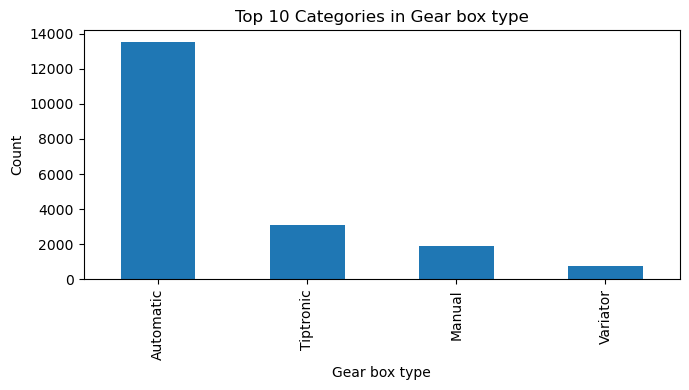

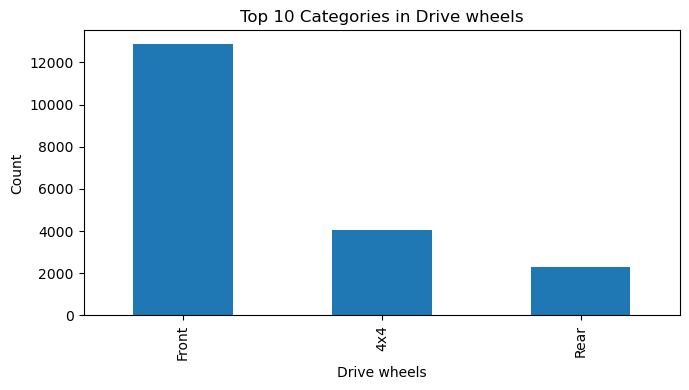

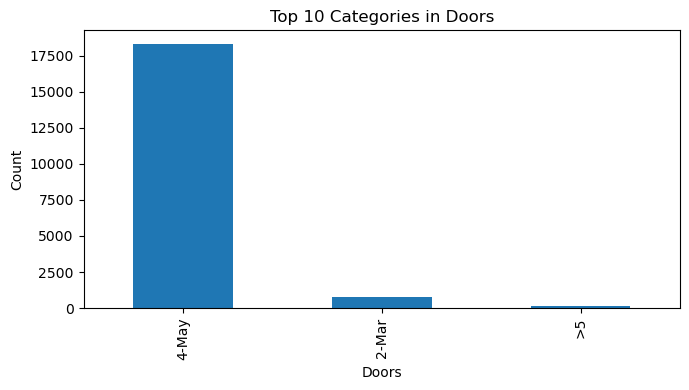

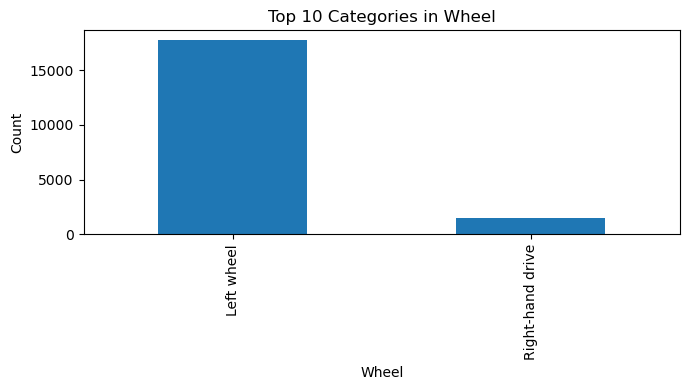

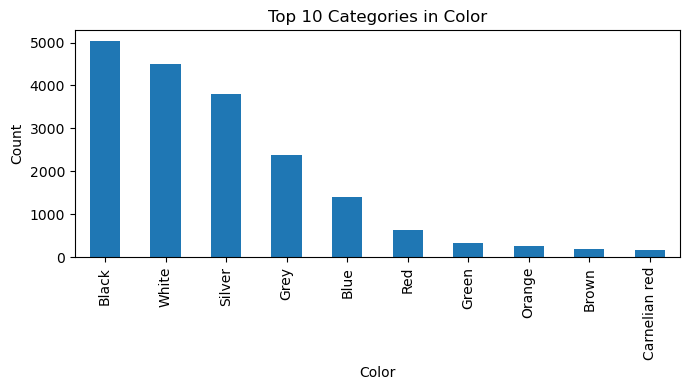

In [8]:
# Categorical features distribution
cat_features = df.select_dtypes(include=["object", "category"]).columns

# To plot the top 10 categories for each categorical feature
for col in cat_features:
    plt.figure(figsize=(7, 4))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top 10 Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

Inisghts:

This categorical features has showed the varied distribution across the dataset. 

This was done to help me understand the frequency and alance of the categorical variaible within my dataset, its important as it helps with indetifying any domainant categories, rare values, and feature with limited variability, which could affect how well the machine learning model learns the pattern after encoding. 
By being able to vissualise the top categories for each of the feature, it help me to make a better informed decision on wheter to retain, group or remove and certain categorical variables before the modelling step. 

For the Category feature, the dataset is heavily domiated by Sedan, Jeep, and Hatchback vehicle types, while the categories such as Pickup, Cabriolet and Goods wagon appear very infrequently. So this indicates that there is a strong class imbalance withing the vehicle body types, where there is a small number of categories account for the majority of observations. 

For the Leather interior feature, it contains only two categories which is "Yes" and "No", but the vehicles that has the leather interiors appears more frequently. So this somewhat simple distribution suggests that the leather interiror is a more common characteristic within the dataset and may affect the difference in the vehicle quality or the pricing. 

For the Fuel type feature, it shows that there is a large proportion of Petrol vehicle in the dataset, followed by the Dieel and Hybrid vehicles. While in contrat, LPG,CNG, Plug in Hybrid and Hydrogen vehicles only occurs in small numbers. So this does highlight that the skewed distribution where alternative fuel type are underrepresented.

For the Gear box type feature, the Automatic transmission is the most prevalent, with the Tiptronic and the Manual transmissing appearing less frequently, while the Variator transmissing is also the least commong one. Hence, the distribution does reflect that there is a strong prefernece towards automatic transmission in the dataset.

For the Drive wheel feature, it is also imbalanced, with the Front-wheel drive(fwd) being the most common configuration, while the Rear-wheel drive and the All-wheel drive(awd) does appear less frequently. But despite the imbalance, there are multiple drivetrain (rwd) configuration that are in the dataset.

For the Wheel feature, it does show that majority of the vehicles are left-hand drive, while there is only a small portion of right-hand drive vehicles. Which indicates that there are limited variability in the steeering orientation. 

Lastly, the Doors_group feature, it shows that most of the vehicles have four or more doors (le_4), while vehicles that has lesser doors (gt_4) are more rare. So this does suggest that the dataset is heavily skewed towards the standard multi-door vehicles.

In conclusion, this analysis does show that a few of the variables are imbalances and have limited variation. Which helps provide me with a clearer understanding of the dataset to help with the later part of my data cleaning and feature engineering.

### 2.3.2 Understanding relationship between variables

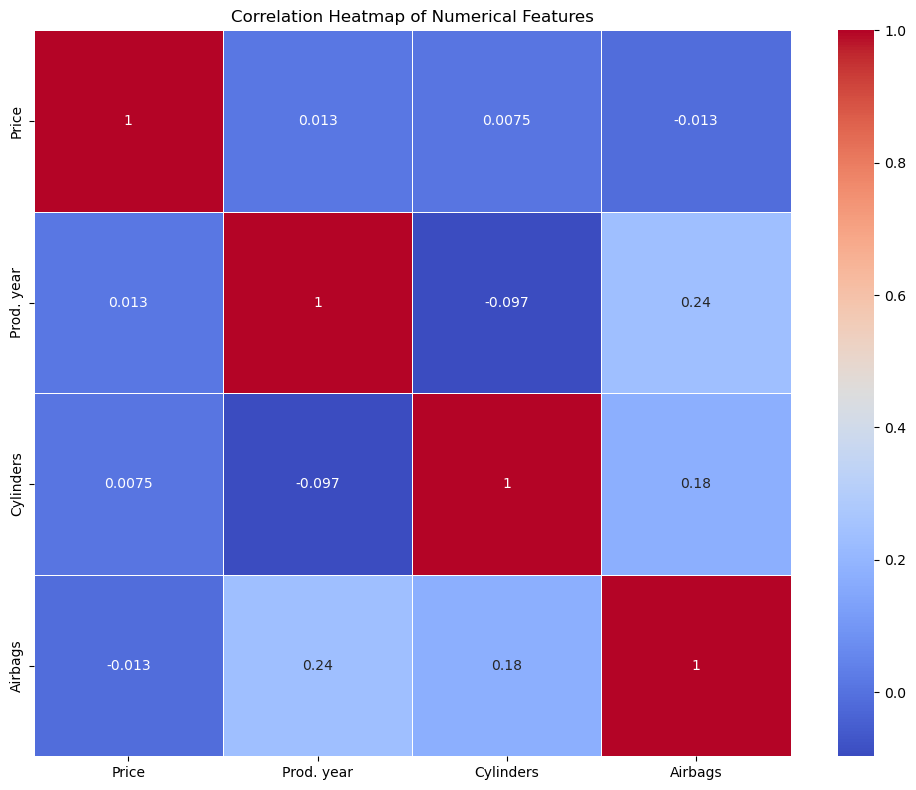

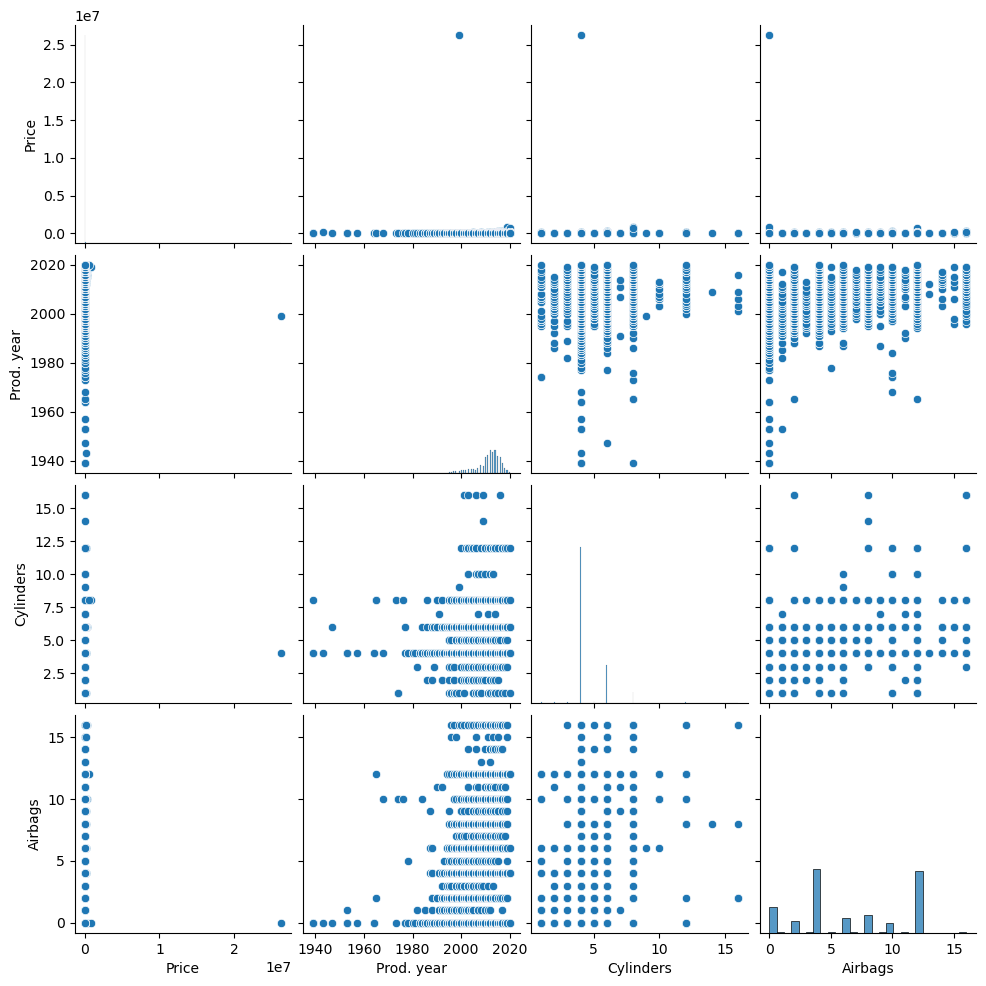

In [9]:
## Understanding relationship between variables

# Select numerical columns only
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# Pairplot for selected important numerical features
selected_features = [col_y] + list(
    df.select_dtypes(include=["int64", "float64"]).columns
    .drop(col_y)
    .sort_values()[:3]   # take a few numerical features only
)

sns.pairplot(df[num_cols])
plt.show()


Insights: 

The correlation heatmap (the first visual), it shows that the Pirce has a very weak correlations with the Production year, Cylinders, and Airbags, with the values being close to zero. Which indicates that the vehicle price dosent have a strong relationship with any of the single numerical variable. Although there is a little positive relationship between the Production year and the Airbags, which may suggest that the newer vehicles does have more safety features. 

While the pairplot (the second value), help to further support the finding as the scatter plots involving the Price does show a widely dispered points with no clear linear trend at all. As well as several numerical varibale does exhibit discrete values, which results in clustered patters rather than any continuous relationship.

Hence, this analysis does show there is a weak linear relationship between the numerical features and the Price, which shows that the Price might be affected by other multiple factors instead of just a single numerical attribute.

# 3. Data Preparation

## 3.1 Data Cleaning

In [10]:
## Data preprocessing - to drop any unnecessary columns
print("Initial dataset shape")
print(df.shape)

print("\nData types")
print(df.dtypes)

# Drop columns that are not required for modelling
drop_cols = ["ID", "Manufacturer", "Model", "Color"]
drop_exist = [c for c in drop_cols if c in df.columns]
df = df.drop(columns=drop_exist)

print("\nDropped columns")
print(drop_exist)

print("\nRemaining columns")
print(df.columns.tolist())

print("\nDataset shape after dropping columns")
print(df.shape)


Initial dataset shape
(19237, 17)

Data types
Price                int64
Levy                object
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object

Dropped columns
['Manufacturer', 'Model', 'Color']

Remaining columns
['Price', 'Levy', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Airbags']

Dataset shape after dropping columns
(19237, 14)


Insights:

I have reviews the dataset structure, which includes its shape and the data types, so currently the dataset has 19237 records and 17 columns, which consist of both numerical and categorical features, but is 1 column short as I have previously dropped the "ID" column. 

The columns that aren't relevant are Manufacturer, Model and Color, as well as dropping "ID" again incase the top hasn't dropped it successfully yet, as none of this 4 columns provide any predictive value for the vehicle price, which they are either just descriptive or only used as a identifiers. 

After removing the columns, the current dataset has only 14 relevant features while reaining all the records. So this help with simplifying the dataset and ensuring that only attributes that are meaningful are kept for the preprocessing and modelling. 

In [11]:
def clean_numeric_col(series):
    s = series.astype(str).str.replace(",", "", regex=False).str.strip()
    s = s.replace(["-", "nan", "None", ""], np.nan)
    return pd.to_numeric(s, errors="coerce")


def boxplot_series(series, title, xlabel):
    plt.figure(figsize=(7, 3))
    plt.boxplot(series.dropna(), vert=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()


def cap_outliers_iqr(series, k):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    low = q1 - k * iqr
    high = q3 + k * iqr

    capped = series.clip(lower=low, upper=high)
    return capped, low, high


This portion is to define the helper function that will be used for below, which includes a function to clean and convert the numeric columns stored as text, a function to help with visuallising the numerical distribution using boxplot, and a function to handle the outlier using the IQR method by capping the extreme values. 

So all this can help ensure that my numerical features are clean, consistent and would be suitable for modelling. 

Missing values in Price
0
Rows dropped due to missing Price
0
Price statistics before outlier handling
count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64


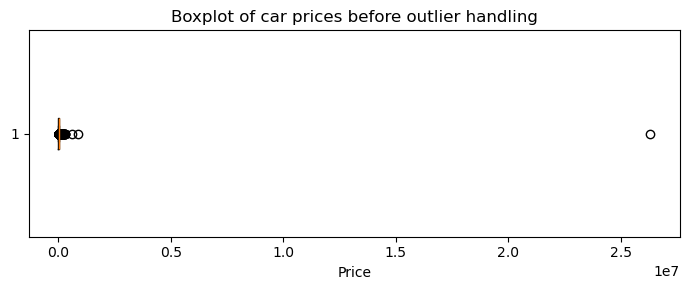

In [12]:
# Ensure Price is numeric
df["Price"] = clean_numeric_col(df["Price"])

print("Missing values in Price")
print(df["Price"].isna().sum())

before = len(df)
df = df.dropna(subset=["Price"])
print("Rows dropped due to missing Price")
print(before - len(df))

print("Price statistics before outlier handling")
print(df["Price"].describe())

boxplot_series(df["Price"], "Boxplot of car prices before outlier handling", "Price")

Outlier capping limits for Price
Lower cap
-11413.0
Upper cap
38819.0
Price statistics after outlier handling
count    19237.000000
mean     15234.153818
std      12061.520819
min          1.000000
25%       5331.000000
50%      13172.000000
75%      22075.000000
max      38819.000000
Name: Price_clean, dtype: float64


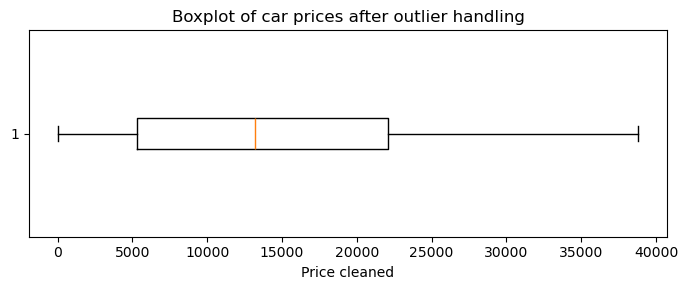

In [13]:
# Handle outliers using IQR capping
k = 1.0
df["Price_clean"], low, high = cap_outliers_iqr(df["Price"], k)

print("Outlier capping limits for Price")
print("Lower cap")
print(low)
print("Upper cap")
print(high)

print("Price statistics after outlier handling")
print(df["Price_clean"].describe())

boxplot_series(df["Price_clean"], "Boxplot of car prices after outlier handling", "Price cleaned")


Insights:

Before the outlier handling, the Price feature was analysed using the summary statistic and a boxplot, and though there wasn't any missing values, the distribution does show that there is an extreme price values, with a huge range between the minimum and the maximum prices. Hence the boxplot shows that there several high end outliers, which indicates that it is highly skewed price distribution that could negatively affect the model performance. 

As there is extreme values, I have decided to use the Interquartile Range (IQR) method to handle the outliers, instead of removing the obeservation, the outliers have been capped within the deined lower and upper bound. So that I am able to preserve all teh data point while reducing the influence of the extreme price values on the model.

After I had applied the IQR-based capping, the price distribution became more balanced, which the extreme values were now limited, so that the distribution is more stable and better suited for the machine learning models and helping with improving the robustness of the model.

Levy:
Levy statistics BEFORE filling missing values
count    13418.000000
mean       906.838128
std        461.867051
min         87.000000
25%        640.000000
50%        781.000000
75%       1058.000000
max      11714.000000
Name: Levy_raw, dtype: float64


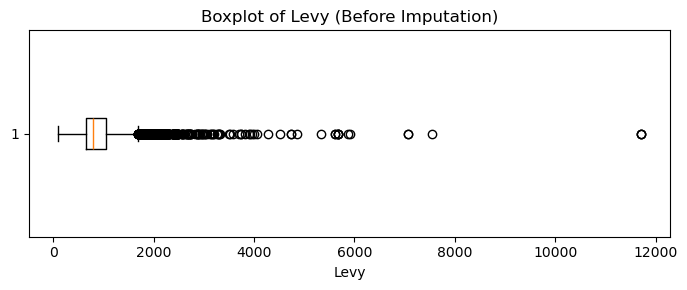

Levy statistics AFTER cleaning
count    19237.000000
mean       868.773353
std        390.040440
min         87.000000
25%        730.000000
50%        781.000000
75%        917.000000
max      11714.000000
Name: Levy, dtype: float64


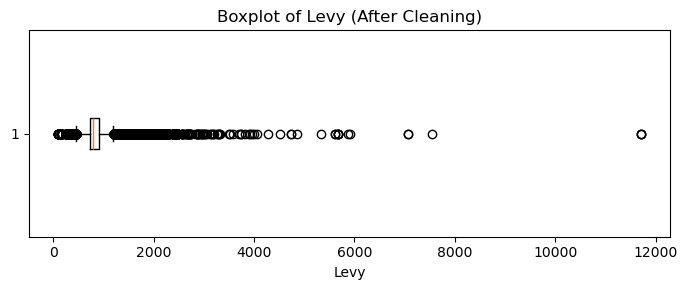

Production Year:
Production year statistics BEFORE cleaning
count    19237.000000
mean      2010.912824
std          5.668673
min       1939.000000
25%       2009.000000
50%       2012.000000
75%       2015.000000
max       2020.000000
Name: Prod. year, dtype: float64


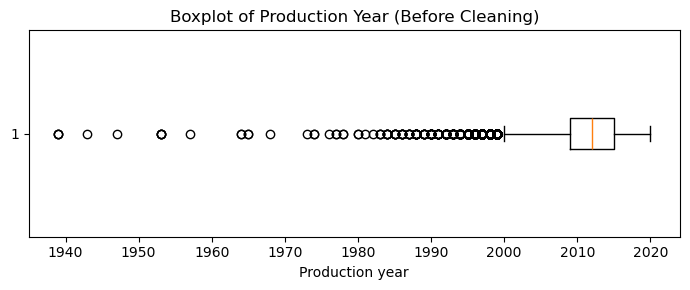

Rows removed with production year before 1990
69
Production year statistics AFTER cleaning
count    19168.000000
mean      2011.032085
std          5.250004
min       1990.000000
25%       2009.000000
50%       2012.000000
75%       2015.000000
max       2020.000000
Name: Prod. year, dtype: float64


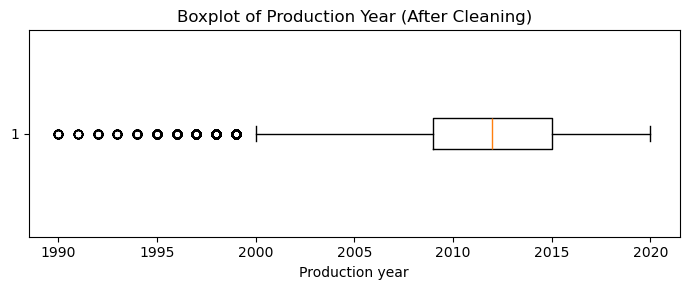

In [14]:
# Levy
print("Levy:")

# Convert the Levy to numeric FIRST
df["Levy_raw"] = clean_numeric_col(df["Levy"])

# BEFORE filling missing values
print("Levy statistics BEFORE filling missing values")
print(df["Levy_raw"].describe())

boxplot_series(df["Levy_raw"], "Boxplot of Levy (Before Imputation)", "Levy")

# Fill missing values
df["Levy"] = df["Levy_raw"].fillna(df["Levy_raw"].median())

# AFTER cleaning
print("Levy statistics AFTER cleaning")
print(df["Levy"].describe())

boxplot_series(df["Levy"], "Boxplot of Levy (After Cleaning)", "Levy")

# drop the helper column
df = df.drop(columns=["Levy_raw"])

# Production year
print("Production Year:")

# Before cleaning of the Production year
print("Production year statistics BEFORE cleaning")
print(df["Prod. year"].describe())

boxplot_series(df["Prod. year"], "Boxplot of Production Year (Before Cleaning)", "Production year")

# Clean Production year
df["Prod. year"] = pd.to_numeric(df["Prod. year"], errors="coerce")
df["Prod. year"] = df["Prod. year"].fillna(df["Prod. year"].median())

before = len(df)
df = df[df["Prod. year"] >= 1990]

print("Rows removed with production year before 1990")
print(before - len(df))

# After cleaning of the Production year
print("Production year statistics AFTER cleaning")
print(df["Prod. year"].describe())

boxplot_series(df["Prod. year"], "Boxplot of Production Year (After Cleaning)", "Production year")

Insights: 

For the Levy feature, intially it contains non-nuerical values such as the dashes "-", which has prevented it from being in the numerical analysis. Hence, I had converted the dashes "-" into missing values (NaN), after I had imputed these missing values using the median of the Levy value ensuring that the data completeness. After it was done processing, the Levy feature becomes fully numeric with no remaining missing values. Which the final statitcs and boxplots shows that the distribution remains right skewed, which tend to be expected for cost related attributes, so it is still suitable for modelling.

While for the Production year feature, although the values were already numeric and there was no missing values, I had still included the number conversion and imputation steps for consistency and incase I had any data had been missed out. I had remove vehicles that were produced before 1990, as these entries were relatively fewer and less representaitve of the current vehicle market. So after I had made the filtering, the distribution was more compact and it focuses more on the recent years, so that it is also more relevant for the machine learning models.

In [15]:
# Engine volume cleaning
print("\nEngine volume changes:")
print("- Converted to all lowercase")
print("- Removed any 'turbo' text")
print("- Extracted the numeric part (e.g., 2.0 from '2.0 turbo')")
print("- Converted any of the numeric and filled missing values with median")

ev = df["Engine volume"].astype(str).str.lower()
ev = ev.str.replace("turbo", "", regex=False)
ev = ev.str.extract(r"([\d\.]+)")
df["Engine volume"] = pd.to_numeric(ev[0], errors="coerce")
df["Engine volume"] = df["Engine volume"].fillna(df["Engine volume"].median())


# Mileage cleaning
print("\nMileage changes:")
print("- Converted to all lowercase")
print("- Removed all the 'km' text and commas")
print("- Replaced any invalid values such as ('-', '') with NaN")
print("- Converted any of the numeric and filled missing values with median")

m = df["Mileage"].astype(str).str.lower()
m = m.str.replace("km", "", regex=False).str.replace(",", "", regex=False).str.strip()
m = m.replace(["-", "nan", "None", ""], np.nan)
df["Mileage"] = pd.to_numeric(m, errors="coerce")
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].median())

# Cylinders
print("\nCylinders changes:")
print("- Converted all to numeric")
print("- Filled in any missing values with median")

df["Cylinders"] = pd.to_numeric(df["Cylinders"], errors="coerce")
df["Cylinders"] = df["Cylinders"].fillna(df["Cylinders"].median())

# Airbags
print("\nAirbags changes:")
print("- Converted all to numeric")
print("- Filled in any missing values with median")

df["Airbags"] = pd.to_numeric(df["Airbags"], errors="coerce")
df["Airbags"] = df["Airbags"].fillna(df["Airbags"].median())

# Final checking 
print("\nMissing values after numeric cleaning (all the columns):")
print(df.isna().sum())



Engine volume changes:
- Converted to all lowercase
- Removed any 'turbo' text
- Extracted the numeric part (e.g., 2.0 from '2.0 turbo')
- Converted any of the numeric and filled missing values with median

Mileage changes:
- Converted to all lowercase
- Removed all the 'km' text and commas
- Replaced any invalid values such as ('-', '') with NaN
- Converted any of the numeric and filled missing values with median

Cylinders changes:
- Converted all to numeric
- Filled in any missing values with median

Airbags changes:
- Converted all to numeric
- Filled in any missing values with median

Missing values after numeric cleaning (all the columns):
Price               0
Levy                0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Airbags             0
Price_clean         0
dtype: int64


Insights:

For the Engine volume feature , there are values containing the text "turbo" were standardised by extracting the numeric component and converting the feature into  a numeric format. As well as, converting the feature into numeric format with missing values filled using a median. 

For the Mileage feature, the values were cleaned by removing any text, commas or invalid entries before doing the numeric conversion and median imputation. 

For the Cylinders and Airbags feature, the values were converted directly into a numeric format, and if there were any missing values they would be handles using the median. 

After all these steps, I had done a final check to ensure there are no more missing values across all the numerical features, so that they are prepared for the modelling.

In [16]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Categorical columns")
print(cat_cols)

print("Unique values per categorical column")
for c in cat_cols:
    print(c, df[c].nunique())

print("Top values per categorical column")
for c in cat_cols:
    print(c)
    print(df[c].value_counts().head())
    print()


Categorical columns
['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel']
Unique values per categorical column
Category 11
Leather interior 2
Fuel type 7
Gear box type 4
Drive wheels 3
Doors 3
Wheel 2
Top values per categorical column
Category
Category
Sedan        8705
Jeep         5459
Hatchback    2843
Minivan       646
Coupe         527
Name: count, dtype: int64

Leather interior
Leather interior
Yes    13940
No      5228
Name: count, dtype: int64

Fuel type
Fuel type
Petrol    10094
Diesel     4030
Hybrid     3578
LPG         892
CNG         487
Name: count, dtype: int64

Gear box type
Gear box type
Automatic    13505
Tiptronic     3102
Manual        1815
Variator       746
Name: count, dtype: int64

Drive wheels
Drive wheels
Front    12863
4x4       4043
Rear      2262
Name: count, dtype: int64

Doors
Doors
4-May    18281
2-Mar      759
>5         128
Name: count, dtype: int64

Wheel
Wheel
Left wheel          17684
Right-hand drive     1

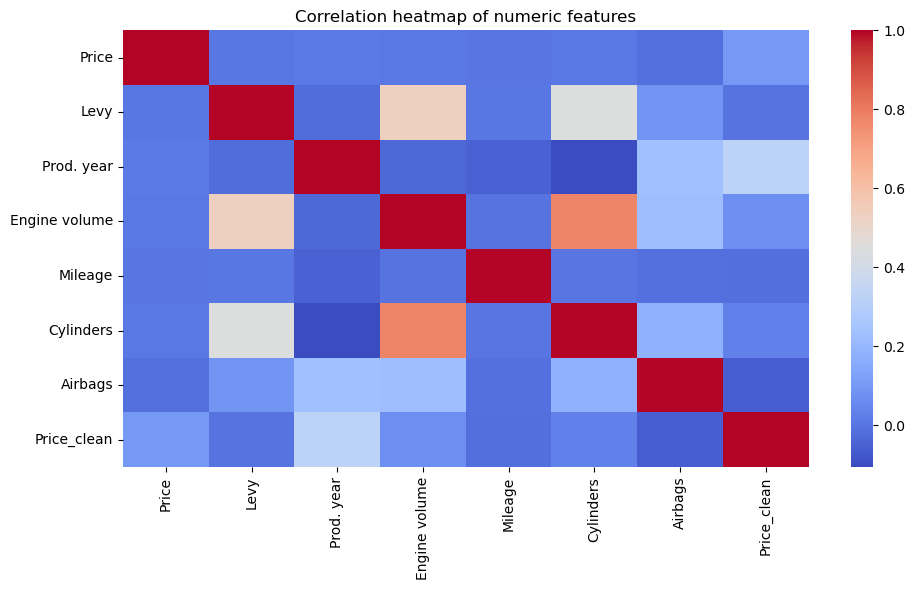

Correlation with Price_clean
Price_clean      1.000000
Prod. year       0.321713
Price            0.097194
Engine volume    0.070450
Cylinders        0.028216
Levy            -0.002803
Mileage         -0.018066
Airbags         -0.061589
Name: Price_clean, dtype: float64


In [17]:
# Correlation analysis (numeric only)
num_df = df.select_dtypes(include=["number"]).copy()

plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation heatmap of numeric features")
plt.tight_layout()
plt.show()

# Correlation with target (no log)
target = "Price_clean"

if target in num_df.columns:
    print("Correlation with " + target)
    print(num_df.corr()[target].sort_values(ascending=False))
else:
    print("Target column not found")
    print("Available numeric columns")
    print(num_df.columns.tolist())

In [18]:
# Category integer encoding
cats = sorted(df["Category"].dropna().astype(str).unique())
cat_map = {v: i for i, v in enumerate(cats)}
df["Category_encoded"] = df["Category"].astype(str).map(cat_map)

# Leather binary
leather = df["Leather interior"].astype(str).str.lower().str.strip()
df["Leather_binary"] = leather.map({"yes": 1, "no": 0})
df["Leather_binary"] = df["Leather_binary"].fillna(0).astype(int)

# Wheel binary
wheel = df["Wheel"].astype(str).str.lower().str.strip()
df["Wheel_binary"] = np.where(wheel.str.contains("left", na=False), 0, np.nan)
df["Wheel_binary"] = np.where(wheel.str.contains("right", na=False), 1, df["Wheel_binary"])
df["Wheel_binary"] = df["Wheel_binary"].fillna(df["Wheel_binary"].mode().iloc[0]).astype(int)


In [19]:
# Drive wheels standardisation
dw = df["Drive wheels"].astype(str).str.lower().str.strip()
df["Drive wheels"] = dw.replace({
    "front": "fwd",
    "rear": "rwd",
    "4x4": "awd",
    "4wd": "awd"
})

# Doors grouping
d = df["Doors"].astype(str).str.extract(r"(\d+)")
df["Doors"] = pd.to_numeric(d[0], errors="coerce")

if df["Doors"].notna().any():
    df["Doors"] = df["Doors"].fillna(df["Doors"].mode().iloc[0])
else:
    df["Doors"] = df["Doors"].fillna(4)

df["Doors_group"] = np.where(df["Doors"] <= 4, "le_4", "gt_4")

before = len(df)
df = df.drop_duplicates()
print("Duplicate rows removed")
print(before - len(df))

Duplicate rows removed
3551


In [20]:
print("Columns and data types in df before feature selection")
print(df.dtypes)
print("Columns list")
print(df.columns.tolist())

# Target (Option A no log)
y = df["Price_clean"].copy()

# Columns to drop from modelling
drop_cols = [
    "Price",
    "Price_clean",
    "Price_log",
    "Category",
    "Leather interior",
    "Wheel",
    "Doors"
]

print("Columns planned to be dropped from X")
print(drop_cols)

# Build feature matrix
X = df.drop(columns=drop_cols, errors="ignore").copy()

Columns and data types in df before feature selection
Price                 int64
Levy                float64
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                 int64
Wheel                object
Airbags               int64
Price_clean           int64
Category_encoded      int64
Leather_binary        int64
Wheel_binary          int64
Doors_group          object
dtype: object
Columns list
['Price', 'Levy', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Airbags', 'Price_clean', 'Category_encoded', 'Leather_binary', 'Wheel_binary', 'Doors_group']
Columns planned to be dropped from X
['Price', 'Price_clean', 'Price_log', 'Category', 'Leather interior', 'Wheel', 'Doors'

In [21]:
# Remove ID from modelling if present
if "ID" in X.columns:
    X = X.drop(columns=["ID"], errors="ignore")
    print("ID column removed from X")

print("Columns and data types in X before one hot encoding")
print(X.dtypes)

print("Columns remaining in X before one hot encoding")
print(X.columns.tolist())

# One hot encode remaining categorical columns
X = pd.get_dummies(X, drop_first=True)

# Convert bool to int (optional but cleaner for some models)
for c in X.columns:
    if X[c].dtype == bool:
        X[c] = X[c].astype(int)

Columns and data types in X before one hot encoding
Levy                float64
Prod. year            int64
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Airbags               int64
Category_encoded      int64
Leather_binary        int64
Wheel_binary          int64
Doors_group          object
dtype: object
Columns remaining in X before one hot encoding
['Levy', 'Prod. year', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Airbags', 'Category_encoded', 'Leather_binary', 'Wheel_binary', 'Doors_group']


In [22]:
# Fill missing values
X = X.fillna(0)

print("Columns and data types in X after one hot encoding")
print(X.dtypes)

print("Columns used for modelling after encoding")
print(X.columns.tolist())

print("Final feature matrix shape")
print(X.shape)

print("Target shape")
print(y.shape)

print("Count of data types in X")
print(X.dtypes.value_counts())

print("Remaining object or category columns in X")
print(X.select_dtypes(include=["object", "category"]).columns.tolist())

print("Columns used for training")
print(X.columns.tolist())

# save to clean csv to see the final feature matrix
X.to_csv("cleaned_X.csv", index=False)

Columns and data types in X after one hot encoding
Levy                        float64
Prod. year                    int64
Engine volume               float64
Mileage                       int64
Cylinders                     int64
Airbags                       int64
Category_encoded              int64
Leather_binary                int64
Wheel_binary                  int64
Fuel type_Diesel              int64
Fuel type_Hybrid              int64
Fuel type_Hydrogen            int64
Fuel type_LPG                 int64
Fuel type_Petrol              int64
Fuel type_Plug-in Hybrid      int64
Gear box type_Manual          int64
Gear box type_Tiptronic       int64
Gear box type_Variator        int64
Drive wheels_fwd              int64
Drive wheels_rwd              int64
Doors_group_le_4              int64
dtype: object
Columns used for modelling after encoding
['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Category_encoded', 'Leather_binary', 'Wheel_binary', 'Fuel ty

## 3.2 Train-Test Split

In [23]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12493, 21)
X_test shape: (3124, 21)
y_train shape: (12493,)
y_test shape: (3124,)


# 4. Modelling

### 4.2 Train Model

In [24]:
# Models
lr_model = LinearRegression()

dt_model = DecisionTreeRegressor()


rf_model = RandomForestRegressor()

# Gradient Boosting
gbr_model = GradientBoostingRegressor()

# Fit
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

print("Models trained successfully")
print("Linear Regression")
print("Decision Tree")
print("Random Forest")
print("Gradient Boosting")


Models trained successfully
Linear Regression
Decision Tree
Random Forest
Gradient Boosting


In [25]:
# Train Linear Regression model
lr_model.fit(X_train, y_train)

# Train Decision Tree Regressor
dt_model.fit(X_train, y_train)

# Train Random Forest Regressor
rf_model.fit(X_train, y_train)

# Train Gradient Boosting Regressor
gbr_model.fit(X_train, y_train)

print("Models trained successfully:")
print("- Linear Regression")
print("- Decision Tree Regressor")
print("- Random Forest Regressor")
print("- Gradient Boosting Regressor")

Models trained successfully:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor


# 5. Model Evaluation

Model Evaluation sorted by R2
                         Model          MAE         RMSE        R2
2      Random Forest Regressor  4159.398554  6333.578673  0.709410
3  Gradient Boosting Regressor  5297.816389  7212.092233  0.623206
1      Decision Tree Regressor  5309.929738  8572.339613  0.467671
0            Linear Regression  7351.529331  9244.889572  0.380865


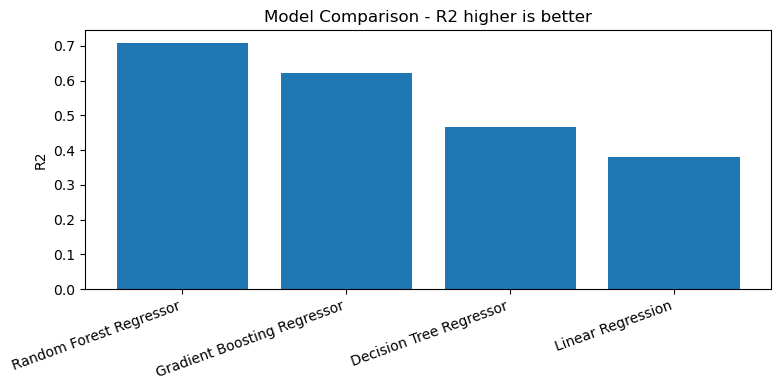

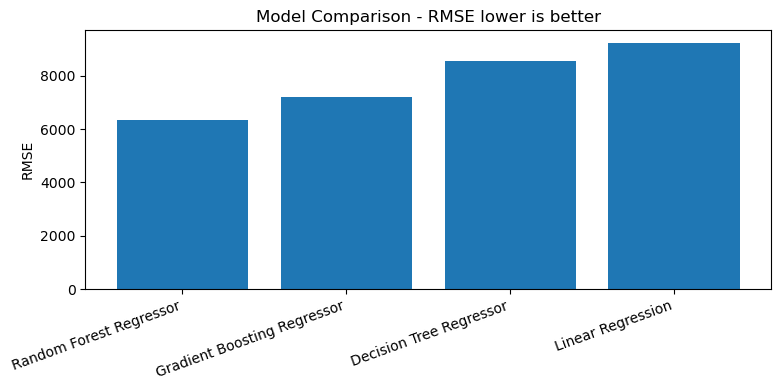

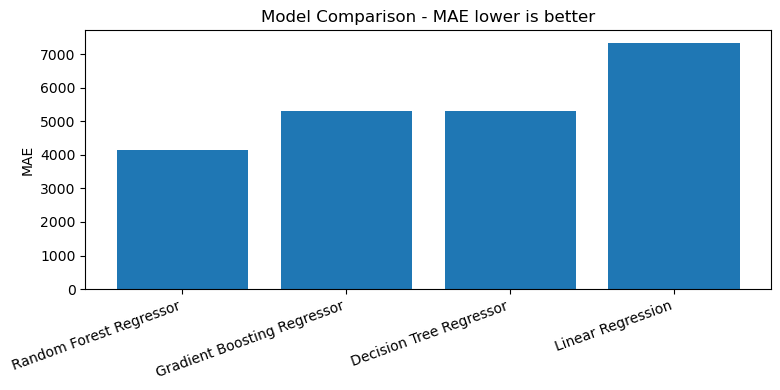

In [26]:
def eval_reg(model, X_te, y_te):
    pred = model.predict(X_te)
    mae = mean_absolute_error(y_te, pred)
    rmse = np.sqrt(mean_squared_error(y_te, pred))
    r2 = r2_score(y_te, pred)
    return pred, mae, rmse, r2


models = {
    "Linear Regression": lr_model,
    "Decision Tree Regressor": dt_model,
    "Random Forest Regressor": rf_model,
    "Gradient Boosting Regressor": gbr_model
}

results = []
preds = {}

for name, m in models.items():
    pred, mae, rmse, r2 = eval_reg(m, X_test, y_test)
    preds[name] = pred
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print("Model Evaluation sorted by R2")
print(results_df)


# Graphs compare models
plt.figure(figsize=(8, 4))
plt.bar(results_df["Model"], results_df["R2"])
plt.title("Model Comparison - R2 higher is better")
plt.xticks(rotation=20, ha="right")
plt.ylabel("R2")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(results_df["Model"], results_df["RMSE"])
plt.title("Model Comparison - RMSE lower is better")
plt.xticks(rotation=20, ha="right")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(results_df["Model"], results_df["MAE"])
plt.title("Model Comparison - MAE lower is better")
plt.xticks(rotation=20, ha="right")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()


Best model based on highest R2
Random Forest Regressor


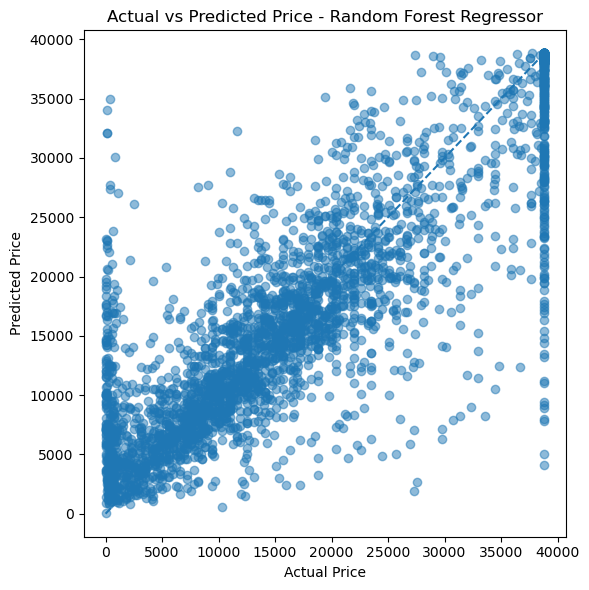

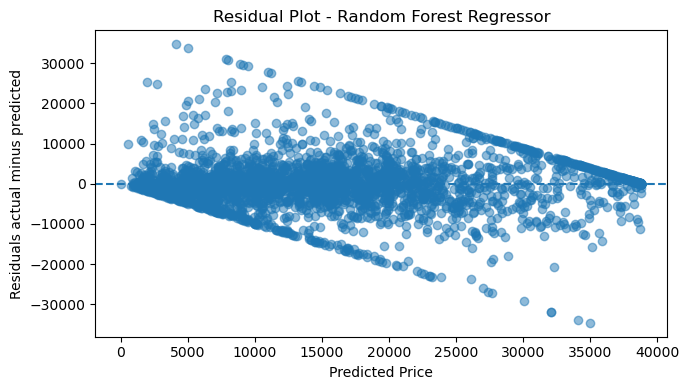

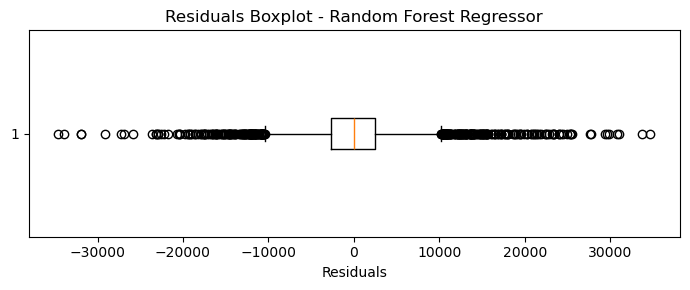

In [27]:
# Best model diagnostics
best_name = results_df.iloc[0]["Model"]
best_pred = preds[best_name]
print("Best model based on highest R2")
print(best_name)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, best_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--")
plt.title("Actual vs Predicted Price - " + best_name)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.tight_layout()
plt.show()

residuals = y_test - best_pred

plt.figure(figsize=(7, 4))
plt.scatter(best_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.title("Residual Plot - " + best_name)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals actual minus predicted")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 3))
plt.boxplot(residuals.dropna(), vert=False)
plt.title("Residuals Boxplot - " + best_name)
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

explain why the number is too low??


## Iterative model development


## Feature Engineering

In [28]:
# Feature Engineering using cleaned dataset from mode evaluation
# Using the baseline Random Forest results from model evaluation to reused for comparison

df_fe = df.copy()

# Create car age from production year
df_fe["Car_Age"] = 2026 - df_fe["Prod. year"]

# Log transform mileage to reduce skew
df_fe["Mileage_log"] = np.log1p(df_fe["Mileage"])

# Interaction feature combining engine size and age
df_fe["Engine_per_Age"] = df_fe["Engine volume"] / (df_fe["Car_Age"] + 1)

# Target variable
y_fe = df_fe["Price_clean"].copy()

# Drop target and unused columns
drop_cols = [
    "Price",
    "Price_clean",
    "Prod. year",
    "Mileage"
]

X_fe = df_fe.drop(columns=drop_cols, errors="ignore")

# One hot encode remaining categorical variables
X_fe = pd.get_dummies(X_fe, drop_first=True)

# Ensure no missing values remain
X_fe = X_fe.fillna(0)

# Train test split using same random state
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe,
    y_fe,
    test_size=0.2,
    random_state=42
)

# Train Random Forest on engineered features
rf_fe = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_fe.fit(X_train_fe, y_train_fe)
pred_fe = rf_fe.predict(X_test_fe)

# Evaluate feature engineered model
mae_fe = mean_absolute_error(y_test_fe, pred_fe)
rmse_fe = np.sqrt(mean_squared_error(y_test_fe, pred_fe))
r2_fe = r2_score(y_test_fe, pred_fe)

print("Random Forest after Feature Engineering")
print("MAE:", round(mae_fe, 2))
print("RMSE:", round(rmse_fe, 2))
print("R2:", round(r2_fe, 4))


Random Forest after Feature Engineering
MAE: 4181.15
RMSE: 6376.77
R2: 0.7054


## HyperParameter Tunning

In [29]:
def print_metrics(title, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    r2 = r2_score(y_true, y_pred)

    print(title)
    print("MAE:", round(mae, 2))
    print("RMSE:", round(rmse, 2))
    print("R2:", round(r2, 4))
    print()
    return mae, rmse, r2

# Baseline engineered model results for comparison
pred_fe = rf_fe.predict(X_test_fe)
mae_fe, rmse_fe, r2_fe = print_metrics(
    "Random Forest after Feature Engineering",
    y_test,
    pred_fe
)

# Hyperparameter tuning using the engineered model as the estimator
param_grid = {
    "n_estimators": [120, 150, 200],
    "max_depth": [15, 20, 35],
    "min_samples_split": [4, 5, 6],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["log2", "sqrt"]
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=rf_fe,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)

search.fit(X_train_fe, y_train)

rf_tuned = search.best_estimator_
pred_tuned = rf_tuned.predict(X_test_fe)

mae_tuned, rmse_tuned, r2_tuned = print_metrics(
    "Random Forest after Hyperparameter Tuning",
    y_test,
    pred_tuned
)

print("Best parameters found")
print(search.best_params_)
print()

final_model = rf_tuned
final_stage = "Hyperparameter Tuning"
if r2_tuned < r2_fe:
    final_model = rf_fe
    final_stage = "Feature Engineering"

print("Final model selected stage:", final_stage)
print("Final R2:", round(max(r2_fe, r2_tuned), 4))

Random Forest after Feature Engineering
MAE: 4181.15
RMSE: 6376.77
R2: 0.7054

Random Forest after Hyperparameter Tuning
MAE: 4229.18
RMSE: 6228.54
R2: 0.719

Best parameters found
{'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 35}

Final model selected stage: Hyperparameter Tuning
Final R2: 0.719


## Streamlit

In [30]:
import joblib

joblib.dump(final_model, "best_car_price_model.pkl")

['best_car_price_model.pkl']